## White Background

In [1]:
# Loading libraries
import numpy as np
from PIL import Image
import pandas as pd
from sklearn import cluster

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
im = Image.open('assets/no.jpg')

In [3]:
im = im.convert('RGBA')

In [4]:
data = np.array(im)
data

array([[[233, 206, 185, 255],
        [235, 208, 187, 255],
        [232, 205, 184, 255],
        ...,
        [217, 190, 169, 255],
        [219, 192, 171, 255],
        [220, 193, 172, 255]],

       [[234, 207, 186, 255],
        [233, 206, 185, 255],
        [232, 205, 184, 255],
        ...,
        [219, 192, 171, 255],
        [220, 193, 172, 255],
        [222, 195, 174, 255]],

       [[236, 209, 188, 255],
        [233, 206, 185, 255],
        [233, 206, 185, 255],
        ...,
        [220, 193, 172, 255],
        [219, 192, 171, 255],
        [220, 193, 172, 255]],

       ...,

       [[208, 180, 156, 255],
        [205, 177, 153, 255],
        [205, 177, 153, 255],
        ...,
        [209, 181, 159, 255],
        [204, 176, 154, 255],
        [204, 176, 154, 255]],

       [[208, 180, 156, 255],
        [205, 177, 153, 255],
        [206, 178, 154, 255],
        ...,
        [209, 181, 159, 255],
        [205, 177, 155, 255],
        [206, 178, 156, 255]],

       [[209

In [5]:
print(data.shape)
print(data[100][10])

(727, 1408, 4)
[230 205 183 255]


In [6]:
red, green, blue, alpha = data.T

image_shape = alpha.shape
image_shape

(1408, 727)

In [7]:
red[100][0]

231

In [8]:
np.tile(np.array([1, 2, 3, 4, 5]), 3)

array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5])

In [9]:
np.tile(range(image_shape[0]), 2).shape

(2816,)

In [10]:
df = pd.DataFrame(data={
    'red': list(red.flatten()),
    'green': list(green.flatten()),
    'blue': list(blue.flatten()),
    'alpha': list(alpha.flatten()),
    'x_coord': np.tile(range(image_shape[0]), image_shape[1]),
    'y_coord': np.repeat(range(image_shape[1]), image_shape[0])
})

df = df.set_index(['x_coord', 'y_coord'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1023616 entries, (0, 0) to (1407, 726)
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   red     1023616 non-null  int8 
 1   green   1023616 non-null  int8 
 2   blue    1023616 non-null  int8 
 3   alpha   1023616 non-null  int8 
dtypes: int8(4)
memory usage: 7.9 MB


In [12]:
df.describe()

,red,green,blue,alpha
count,1.023616e+06,1.023616e+06,1.023616e+06,1023616.0
mean,-4.250806e+01,-6.643431e+01,-8.649585e+01,-1.0
std,1.990358e+01,2.650168e+01,3.224568e+01,0.0
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,-1.0
25%,-4.800000e+01,-7.500000e+01,-9.700000e+01,-1.0
50%,-4.400000e+01,-7.100000e+01,-9.200000e+01,-1.0
75%,-3.900000e+01,-6.500000e+01,-8.600000e+01,-1.0
max,1.270000e+02,1.270000e+02,1.270000e+02,-1.0


In [13]:
# Convert DataFrame to matrix
matrix = df.values

# Using sklearn
km = cluster.KMeans(n_clusters=2)
km.fit(matrix)

# Get cluster assignment labels
labels = km.labels_

# Format results as a DataFrame
results = pd.DataFrame([df.index, labels]).T

In [14]:
pd.Series(labels).value_counts()

0    991376
1     32240
dtype: int64

In [15]:
pd.Series(labels).shape

(1023616,)

In [16]:
df.loc[519].blue.sort_values(ascending=False).value_counts(sort=False)
df['background'] = np.array(np.abs(labels - 1), dtype=bool)

In [17]:
df.groupby('background').apply(lambda x: x.describe())

red          green           blue     alpha
background                                                             
False      count   32240.000000   32240.000000   32240.000000   32240.0
           mean       -7.663865      42.531483      83.882351      -1.0
           std        94.862773      80.865016      29.992909       0.0
           min      -128.000000    -128.000000    -119.000000      -1.0
           25%      -101.000000      31.000000      66.000000      -1.0
           50%        20.000000      70.000000      87.000000      -1.0
           75%        88.000000     100.000000     107.000000      -1.0
           max       127.000000     127.000000     127.000000      -1.0
True       count  991376.000000  991376.000000  991376.000000  991376.0
           mean      -43.641207     -69.977932     -92.036622      -1.0
           std         8.696370      10.669540       8.343607       0.0
           min      -128.000000    -128.000000    -128.000000      -1.0
           25%       -48.000000     -75.000000     -97.000000      -1.0
           50%       -44.000000     -71.000000     -92.000000      -1.0
           75%       -39.000000     -65.000000     -87.000000      -1.0
           max       127.000000     127.000000     -49.000000      -1.0

In [18]:
df.loc[df.background == True, ['red', 'green', 'blue']] = 255

df.loc[:, ['red', 'green', 'blue', 'alpha']].values

array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       ...,
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]], dtype=int8)

In [19]:
new_red = df.red.values.reshape(image_shape).T
new_green = df.green.values.reshape(image_shape).T
new_blue = df.blue.values.reshape(image_shape).T
new_alpha = df.alpha.values.reshape(image_shape).T

In [20]:
new_image = np.dstack((new_red, new_green, new_blue, new_alpha))
new_image.shape

(727, 1408, 4)

In [21]:
result = Image.fromarray(new_image.astype('uint8'), 'RGBA')

### Input

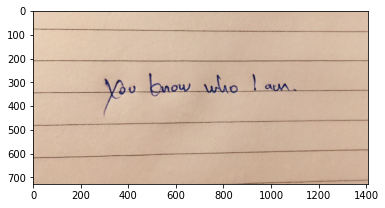

In [22]:
plt.imshow(im)

### Output

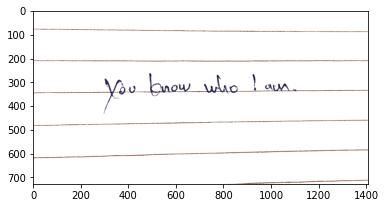

In [23]:
plt.imshow(result)

In [24]:
result.save('assets/yes.png')